# Quickly visualize the distributions of a generated ToyBrain data:

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages
import os, sys
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
from sklearn import datasets, linear_model
from tqdm.notebook import tqdm
import random
import math
import json

from helper.viz_helpers import *

## Generate data
with debug switch on

In [6]:
! python create_toybrains.py -d -n 100

Generative parameter        |        States 
------------------------------------------------------------
brain_vol-radminor         [20 21 22 23 24]
brain_vol-radmajor         [26 27 28 29 30]
brain_thick                [1 2 3 4]
brain_int                  [210 200 190 180 170]
border_int                 ['0-mediumslateblue' '1-slateblue' '2-darkslateblue' '3-darkblue']
vent_thick                 [1 2 3 4]
shape-top_curv             [ 3  4  5  6  7  8  9 10 11]
shape-top_int              ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-top_vol-rad          [2 3 4 5]
shape-midr_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midr_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-midr_vol-rad         [2 3 4 5]
shape-midl_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midl_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkg

## Visualize the data

In [7]:
df = pd.read_csv(glob("toybrains/toybrains_n*.csv")[0]).set_index('subjectID')
# sort dataframe cols by column name
df = df.reindex(sorted(df.columns), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _gen_brain_vol-radmajor   100 non-null    float64
 1   _gen_brain_vol-radminor   100 non-null    float64
 2   _gen_shape-botl_vol-rad   100 non-null    float64
 3   _gen_shape-botr_vol-rad   100 non-null    float64
 4   _gen_shape-midl_vol-rad   100 non-null    float64
 5   _gen_shape-midr_vol-rad   100 non-null    float64
 6   _gen_shape-top_vol-rad    100 non-null    float64
 7   cov_age                   100 non-null    float64
 8   cov_sex                   100 non-null    object 
 9   cov_site                  100 non-null    object 
 10  gen_border_int            100 non-null    object 
 11  gen_brain_int             100 non-null    float64
 12  gen_brain_thick           100 non-null    float64
 13  gen_brain_vol             100 non-null    float64
 14  gen_shape-b

### Distribution of covariates

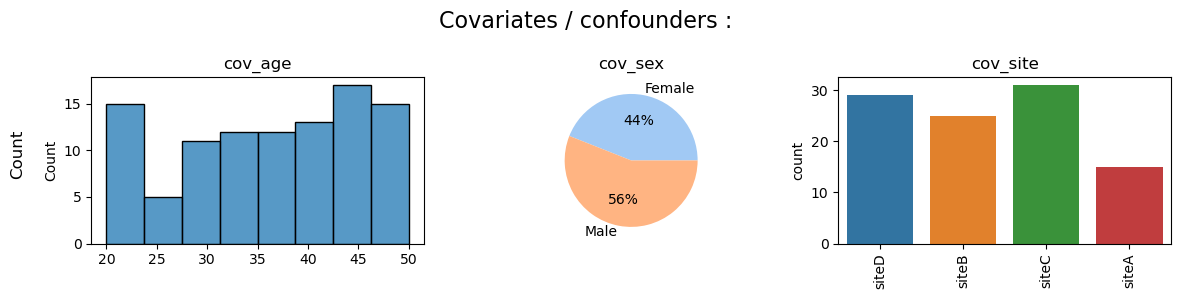

In [8]:
# get all column names starting with 'gen_'
plot_col_dists(df.filter(regex='^cov_'), title="Covariates / confounders :")
plt.show()

#### Distribution of labels

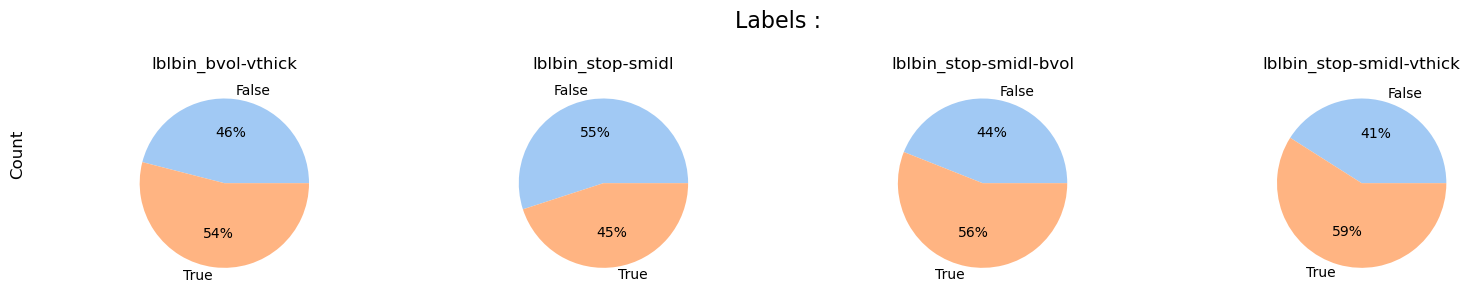

In [9]:
# get all column names starting with 'gen_'
plot_col_dists(df.filter(regex='^lbl'), title="Labels :")
plt.show()

### Distribution of generative params

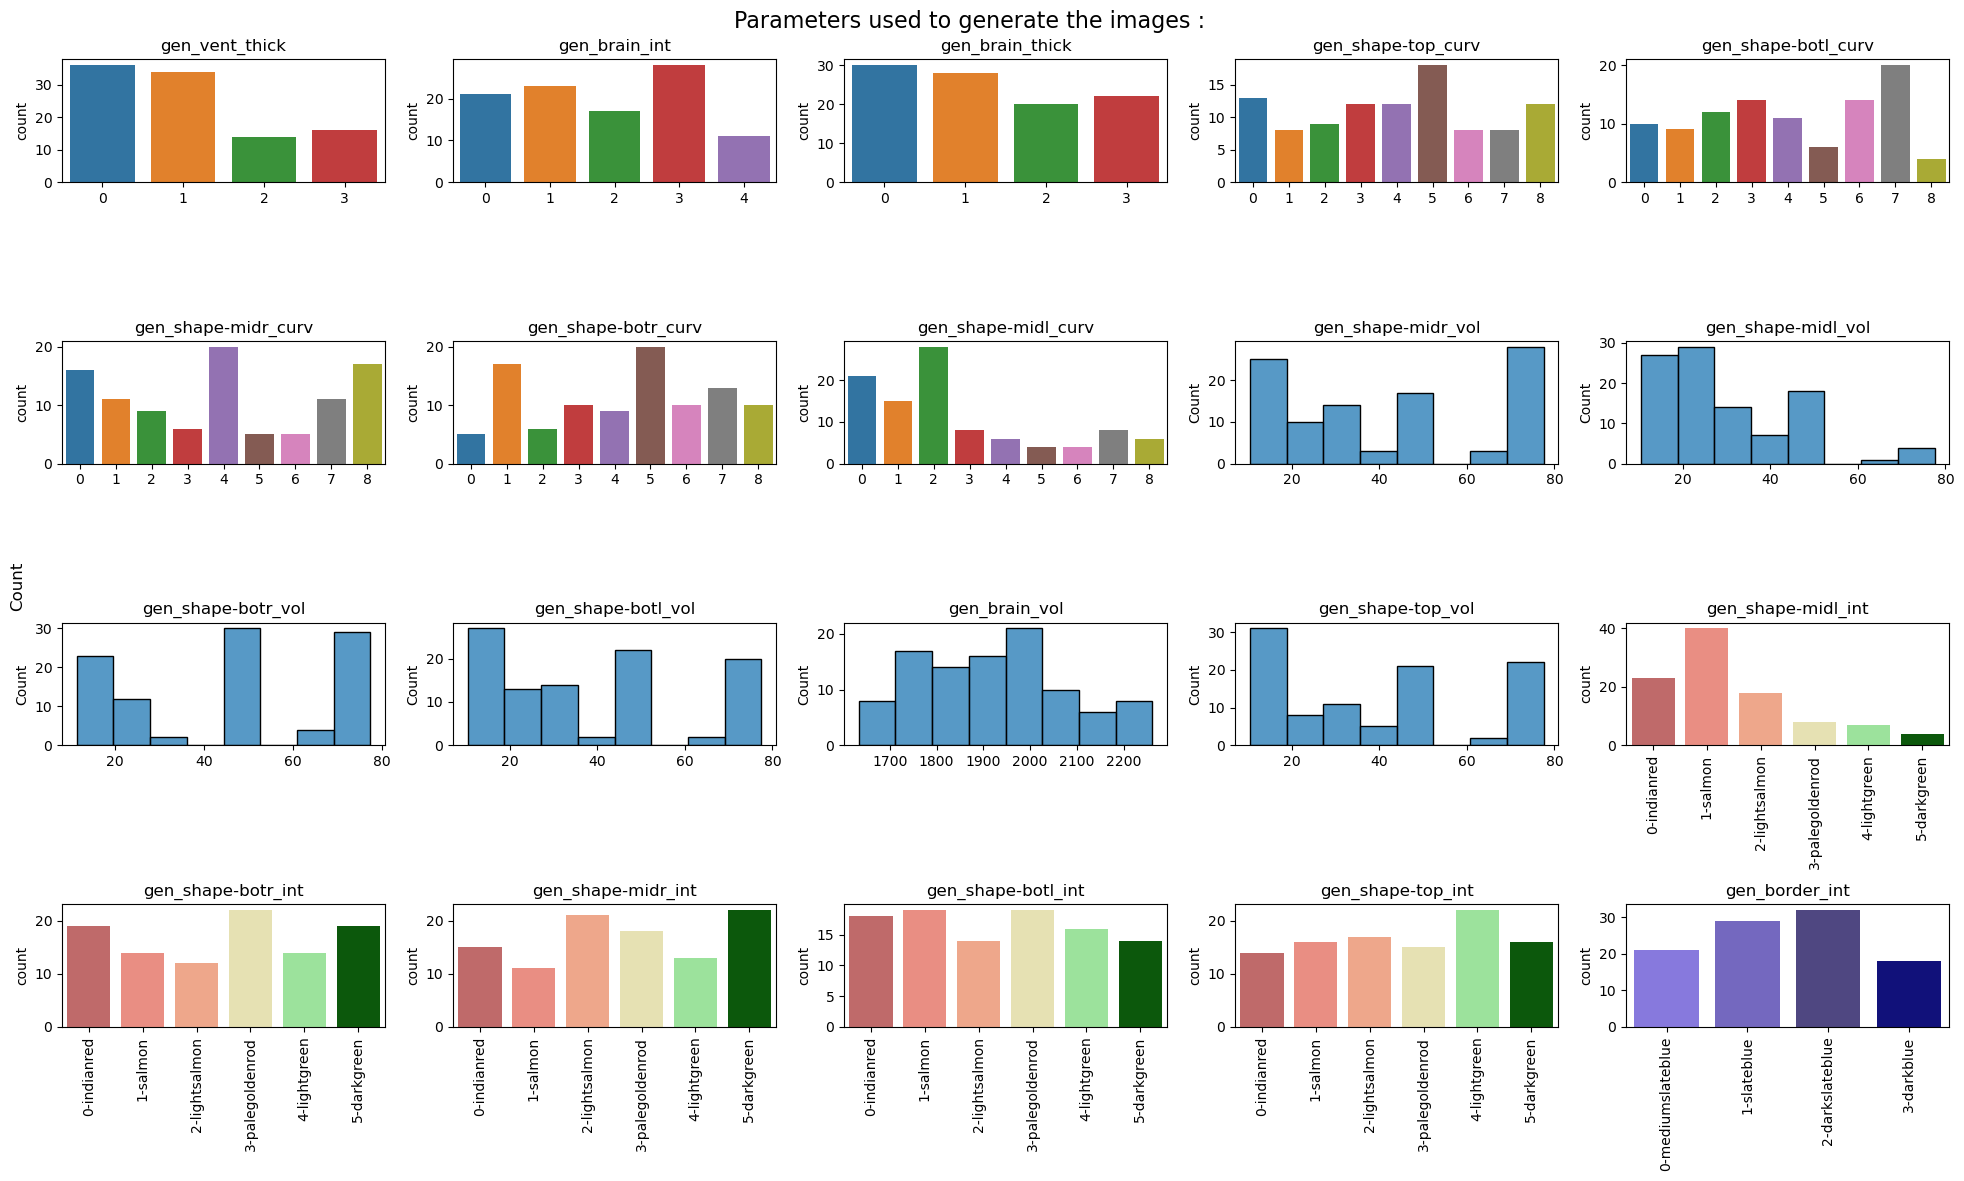

In [15]:
# get all column names starting with 'gen_'
plot_col_dists(df.filter(regex='^gen_'), title="Parameters used to generate the images :")
plt.show()

### Plot distribution across cov values and label groups
TODO: use hue to show different label states for the same distribution

In [ ]:
sns.countplot(data=df, x="gen_brain_vol-radmajor", hue="cov_sex")
plt.show()
sns.countplot(data=df, x="gen_brain_int", hue="cov_site")
plt.show()
sns.histplot(data=df, x="cov_age", hue="gen_vent_thick")
plt.show()

### Images

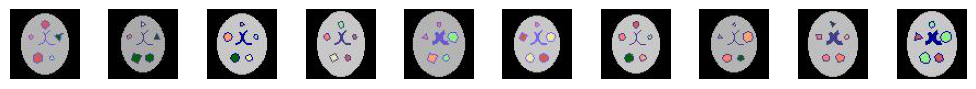

In [16]:
img_files = sorted(glob("toybrains/images/*.jpg"))
show_images(img_files=img_files, n_rows=1)

In [ ]:
## Create the ventricles image

# from PIL import Image, ImageDraw
# S=200
# # Create a new image with a black background
# img = Image.new("RGB", (S, S), color="black")

# # Draw two arcs at the center of the image, facing opposite to each other and touching at the center
# draw = ImageDraw.Draw(img)
# x_off, y_off= 0,0
# xy_r = (S*.2, S*.2, S*.5, S*.5)
# xy_l = (S*.5, S*.2, S*.8, S*.5)
# print(xy_r, xy_l)
# draw.arc(xy_r, start=300, end=100,   fill="red",  width=8)
# draw.arc(xy_l, start=-300, end=-100, fill="blue", width=8)

# # Show the image
# img